In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


In [2]:
db = pd.read_csv('C:/Users/sinda/PycharmProjects/pythonProject/rev.csv')

In [3]:
db.head()

,Unnamed: 0,title,rating,review
0,0,Black Panther: Wakanda Forever,6.0,Not what I expected...:I am conflicted with t...
1,1,Black Panther: Wakanda Forever,8.0,I liked it a lot:Phase 4's MCU comes to a clo...
2,2,Black Panther: Wakanda Forever,6.0,"I Yield:First of all, RIP to Chadwick Boseman..."
3,3,Black Panther: Wakanda Forever,9.0,A Fantastic Emotional and Mature Marvel Fil...
4,4,Black Panther: Wakanda Forever,8.0,Pays an appropriately sombre tribute to its r...


In [4]:
db['rating'].value_counts().sort_index()

1.0      68
2.0      53
3.0      62
4.0      68
5.0      60
6.0      69
7.0      85
8.0     174
9.0     166
10.0    259
Name: rating, dtype: int64

<AxesSubplot:>

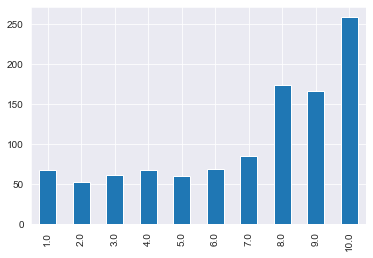

In [5]:
db['rating'].value_counts().sort_index().plot(kind='bar')

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [7]:
from tqdm.notebook import tqdm

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sinda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
sent = SentimentIntensityAnalyzer()

In [10]:
sent.polarity_scores('wooow so good!!')

{'neg': 0.0, 'neu': 0.346, 'pos': 0.654, 'compound': 0.5827}

In [11]:
db.head()

,Unnamed: 0,title,rating,review
0,0,Black Panther: Wakanda Forever,6.0,Not what I expected...:I am conflicted with t...
1,1,Black Panther: Wakanda Forever,8.0,I liked it a lot:Phase 4's MCU comes to a clo...
2,2,Black Panther: Wakanda Forever,6.0,"I Yield:First of all, RIP to Chadwick Boseman..."
3,3,Black Panther: Wakanda Forever,9.0,A Fantastic Emotional and Mature Marvel Fil...
4,4,Black Panther: Wakanda Forever,8.0,Pays an appropriately sombre tribute to its r...


In [12]:
db.rename(columns={'Unnamed: 0':'id'}, inplace=True)


In [13]:
db.head()

,id,title,rating,review
0,0,Black Panther: Wakanda Forever,6.0,Not what I expected...:I am conflicted with t...
1,1,Black Panther: Wakanda Forever,8.0,I liked it a lot:Phase 4's MCU comes to a clo...
2,2,Black Panther: Wakanda Forever,6.0,"I Yield:First of all, RIP to Chadwick Boseman..."
3,3,Black Panther: Wakanda Forever,9.0,A Fantastic Emotional and Mature Marvel Fil...
4,4,Black Panther: Wakanda Forever,8.0,Pays an appropriately sombre tribute to its r...


In [14]:
result = {}
for i, row in tqdm(db.iterrows(), total=len(db)):
     rev = row['review']
     myid = row['id']
     result[myid] = sent.polarity_scores(rev)

  0%|          | 0/1131 [00:00<?, ?it/s]

In [15]:
result

{0: {'neg': 0.076, 'neu': 0.748, 'pos': 0.176, 'compound': 0.9872},
 1: {'neg': 0.084, 'neu': 0.657, 'pos': 0.259, 'compound': 0.9974},
 2: {'neg': 0.106, 'neu': 0.8, 'pos': 0.094, 'compound': -0.9178},
 3: {'neg': 0.087, 'neu': 0.722, 'pos': 0.191, 'compound': 0.9962},
 4: {'neg': 0.103, 'neu': 0.756, 'pos': 0.141, 'compound': 0.9955},
 5: {'neg': 0.13, 'neu': 0.773, 'pos': 0.098, 'compound': -0.9116},
 6: {'neg': 0.116, 'neu': 0.762, 'pos': 0.122, 'compound': 0.6857},
 7: {'neg': 0.033, 'neu': 0.74, 'pos': 0.227, 'compound': 0.9989},
 8: {'neg': 0.042, 'neu': 0.713, 'pos': 0.246, 'compound': 0.9895},
 9: {'neg': 0.098, 'neu': 0.717, 'pos': 0.186, 'compound': 0.9716},
 10: {'neg': 0.038, 'neu': 0.781, 'pos': 0.181, 'compound': 0.9992},
 11: {'neg': 0.11, 'neu': 0.697, 'pos': 0.194, 'compound': 0.9941},
 12: {'neg': 0.114, 'neu': 0.717, 'pos': 0.169, 'compound': 0.952},
 13: {'neg': 0.275, 'neu': 0.629, 'pos': 0.096, 'compound': -0.9722},
 14: {'neg': 0.063, 'neu': 0.812, 'pos': 0.124,

In [16]:
vaderresult = pd.DataFrame(result).T

In [17]:
vaderresult = vaderresult.reset_index().rename(columns={'index':'id'})


In [18]:
vaderresult

,id,neg,neu,pos,compound
0,0,0.076,0.748,0.176,0.9872
1,1,0.084,0.657,0.259,0.9974
2,2,0.106,0.800,0.094,-0.9178
3,3,0.087,0.722,0.191,0.9962
4,4,0.103,0.756,0.141,0.9955
...,...,...,...,...,...
1126,1126,0.104,0.835,0.062,-0.9510
1127,1127,0.066,0.693,0.241,0.9814
1128,1128,0.165,0.735,0.100,-0.9974
1129,1129,0.053,0.855,0.092,0.9847


In [19]:
vaderresult = vaderresult.merge(db, how='left')

In [20]:
vaderresult

,id,neg,neu,pos,compound,title,rating,review
0,0,0.076,0.748,0.176,0.9872,Black Panther: Wakanda Forever,6.0,Not what I expected...:I am conflicted with t...
1,1,0.084,0.657,0.259,0.9974,Black Panther: Wakanda Forever,8.0,I liked it a lot:Phase 4's MCU comes to a clo...
2,2,0.106,0.800,0.094,-0.9178,Black Panther: Wakanda Forever,6.0,"I Yield:First of all, RIP to Chadwick Boseman..."
3,3,0.087,0.722,0.191,0.9962,Black Panther: Wakanda Forever,9.0,A Fantastic Emotional and Mature Marvel Fil...
4,4,0.103,0.756,0.141,0.9955,Black Panther: Wakanda Forever,8.0,Pays an appropriately sombre tribute to its r...
...,...,...,...,...,...,...,...,...
1126,1126,0.104,0.835,0.062,-0.9510,Alien,10.0,This Ageless Silent Haunted House Floating ...
1127,1127,0.066,0.693,0.241,0.9814,Alien,10.0,Original and terrifying sci fi terror:Alien i...
1128,1128,0.165,0.735,0.100,-0.9974,Alien,NaN,Exemplary horror (spoilers):What makes Alien ...
1129,1129,0.053,0.855,0.092,0.9847,Alien,9.0,The original masterpiece that launched a dyna...


In [21]:
import seaborn as sns

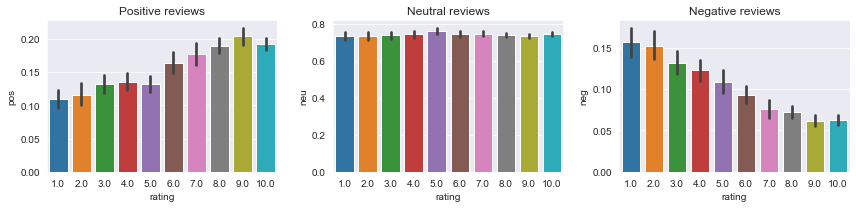

In [22]:

fig, vaderplot = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaderresult, x='rating', y='pos',ax=vaderplot[0])
sns.barplot(data=vaderresult, x='rating', y='neu', ax=vaderplot[1])
sns.barplot(data=vaderresult, x='rating', y='neg', ax=vaderplot[2])
vaderplot[0].set_title('Positive reviews')
vaderplot[1].set_title('Neutral reviews')
vaderplot[2].set_title('Negative reviews')
plt.tight_layout()
plt.show()

 Roberta model